#**Step 1: Imports and Data Preprocessing**

In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("car data.csv")

# Preprocessing
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']

# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine all features
X = pd.concat([df[numerical_cols], df_encoded], axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **Step 2: AdaBoost Regressor**

Algorithm: AdaBoost (Adaptive Boosting)

It boosts multiple weak learners (usually shallow trees).

Learns sequentially, giving more weight to wrongly predicted samples from the last model.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Base learner: a shallow tree
base_estimator = DecisionTreeRegressor(max_depth=4)

# Updated AdaBoost Regressor
ada_model = AdaBoostRegressor(
    estimator=base_estimator,       # ✅ updated keyword
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
ada_model.fit(X_train, y_train)



AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

### 🧠 Key Hyperparameters Explained

| Parameter        | Description                                                   |
| ---------------- | ------------------------------------------------------------- |
| `base_estimator` | Model used for boosting, usually a small tree                 |
| `n_estimators`   | Number of weak learners added sequentially                    |
| `learning_rate`  | Controls contribution of each tree (lower = slower but safer) |
| `max_depth`      | Depth of each weak learner (controls complexity)              |

---

In [ ]:
# Predict and evaluate
ada_pred = ada_model.predict(X_test)

print("🔹 AdaBoost MSE:", mean_squared_error(y_test, ada_pred))
print("🔹 AdaBoost R² Score:", r2_score(y_test, ada_pred))

🔹 AdaBoost MSE: 1.2837788640068244
🔹 AdaBoost R² Score: 0.9442697508771247


# **Step 3: XGBoost Regressor with Explanation**

Algorithm: XGBoost (eXtreme Gradient Boosting)

It’s an optimized version of gradient boosting:

Regularization for better generalization

Built-in handling of missing values

Parallel processing

Pruning & early stopping

In [ ]:
# Install xgboost if not installed
# !pip install xgboost

from xgboost import XGBRegressor

# 🔁 XGBoost Regressor Setup
xgb_model = XGBRegressor(
    n_estimators=100,     # 🔁 number of boosting rounds
    learning_rate=0.1,    # 🔽 step size shrinkage (helps prevent overfitting)
    max_depth=3,          # 🌲 controls tree depth (complexity)
    subsample=0.8,        # 🧪 train each tree on 80% of data (reduces overfitting)
    colsample_bytree=0.8, # 🧬 use 80% of features per tree
    random_state=42
)

# 🎯 Train the model
xgb_model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

| Parameter          | What It Does                                                |
| ------------------ | ----------------------------------------------------------- |
| `n_estimators`     | Number of trees (boosting rounds)                           |
| `learning_rate`    | Shrinks contribution of each tree                           |
| `max_depth`        | Tree complexity                                             |
| `subsample`        | Use only a part of training data per tree (adds randomness) |
| `colsample_bytree` | Use only a part of features per tree (prevents overfitting) |


In [ ]:
# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)

print("🔸 XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("🔸 XGBoost R² Score:", r2_score(y_test, xgb_pred))

🔸 XGBoost MSE: 0.6704383420468013
🔸 XGBoost R² Score: 0.9708955359280653


# **Step 4: LightGBM Regresso**

* Designed for **high performance** on **large datasets**
* Uses:

  * **Histogram-based binning** (makes training faster)
  * **Leaf-wise tree growth** (more accurate, can overfit)
  * Handles **categorical features** but here we use one-hot for consistency



In [ ]:
# Install if not available
# !pip install lightgbm

from lightgbm import LGBMRegressor

# 🔁 LightGBM Regressor Setup
lgb_model = LGBMRegressor(
    n_estimators=100,     # Number of trees
    learning_rate=0.1,    # Step size
    max_depth=3,          # Depth of each tree (controls complexity)
    subsample=0.8,        # Fraction of data per tree (for randomness)
    colsample_bytree=0.8, # Fraction of features per tree
    random_state=42
)

# 🎯 Train the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 7
[LightGBM] [Info] Start training from score 4.642292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(colsample_bytree=0.8, max_depth=3, random_state=42, subsample=0.8)


### 🧠 Key Hyperparameters Explained

| Parameter          | Meaning                             |
| ------------------ | ----------------------------------- |
| `n_estimators`     | Number of boosting rounds           |
| `learning_rate`    | Smaller = slower but safer learning |
| `max_depth`        | Tree depth                          |
| `subsample`        | Fraction of training data per tree  |
| `colsample_bytree` | Fraction of features per tree       |

---

Predictions are saved as `lgb_pred`, just like `ada_pred` and `xgb_pred`, for end comparison.

In [ ]:
# Predict and evaluate
lgb_pred = lgb_model.predict(X_test)

print("🔸 LightGBM MSE:", mean_squared_error(y_test, lgb_pred))
print("🔸 LightGBM R² Score:", r2_score(y_test, lgb_pred))

🔸 LightGBM MSE: 2.5934903495564483
🔸 LightGBM R² Score: 0.8874137381983059


# **Step 5: CatBoost Regressor**

* Specially designed to handle categorical features without encoding

* Uses ordered boosting to avoid overfitting

* Great for tabular datasets and easy to use

In [ ]:
# Install if not available
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

# 🔁 CatBoost Regressor Setup
cat_model = CatBoostRegressor(
    iterations=100,       # 🔁 number of boosting rounds
    learning_rate=0.1,    # 🔽 shrinkage factor
    depth=3,              # 🌲 depth of each tree
    verbose=0,            # 📢 suppress training output
    random_state=42
)

# 🎯 Train the model
cat_model.fit(X_train, y_train)


| Parameter       | What It Does                                  |
| --------------- | --------------------------------------------- |
| `iterations`    | Number of trees (same as `n_estimators`)      |
| `learning_rate` | Controls how much each tree corrects the last |
| `depth`         | Tree depth                                    |
| `verbose`       | Controls print output during training         |


In [ ]:
# Predict and evaluate
cat_pred = cat_model.predict(X_test)

print("🔸 CatBoost MSE:", mean_squared_error(y_test, cat_pred))
print("🔸 CatBoost R² Score:", r2_score(y_test, cat_pred))

🔸 CatBoost MSE: 1.0584077402541447
🔸 CatBoost R² Score: 0.9540533586494462


# **Cmparison of All**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


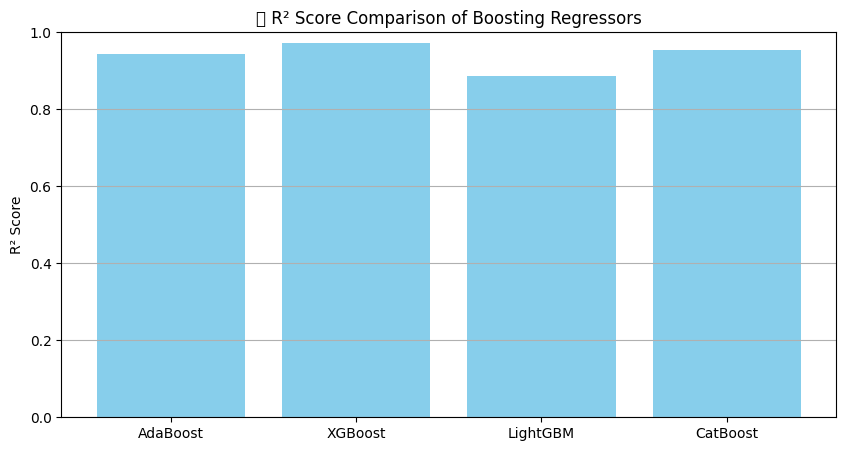

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


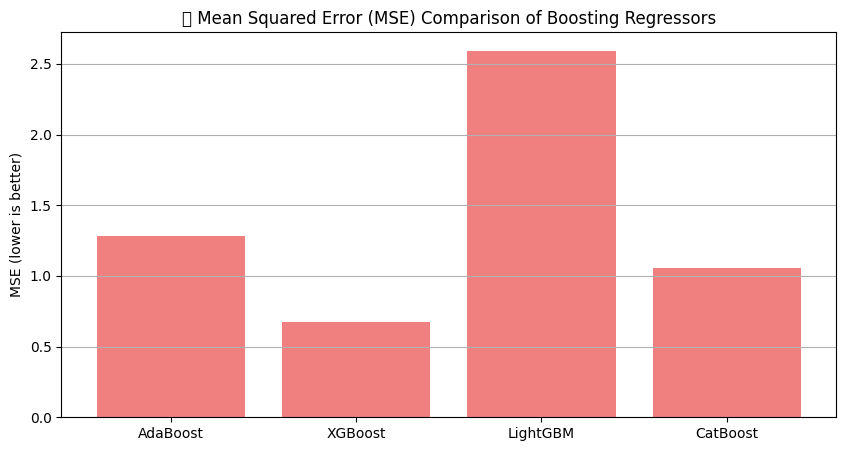

In [52]:
# Prepare evaluation scores
models = ['AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost']
r2_scores = [
    r2_score(y_test, ada_pred),
    r2_score(y_test, xgb_pred),
    r2_score(y_test, lgb_pred),
    r2_score(y_test, cat_pred)
]
mses = [
    mean_squared_error(y_test, ada_pred),
    mean_squared_error(y_test, xgb_pred),
    mean_squared_error(y_test, lgb_pred),
    mean_squared_error(y_test, cat_pred)
]

# Plot R² Scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.title("🔍 R² Score Comparison of Boosting Regressors")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Plot MSE Scores
plt.figure(figsize=(10, 5))
plt.bar(models, mses, color='lightcoral')
plt.title("📉 Mean Squared Error (MSE) Comparison of Boosting Regressors")
plt.ylabel("MSE (lower is better)")
plt.grid(axis='y')
plt.show()

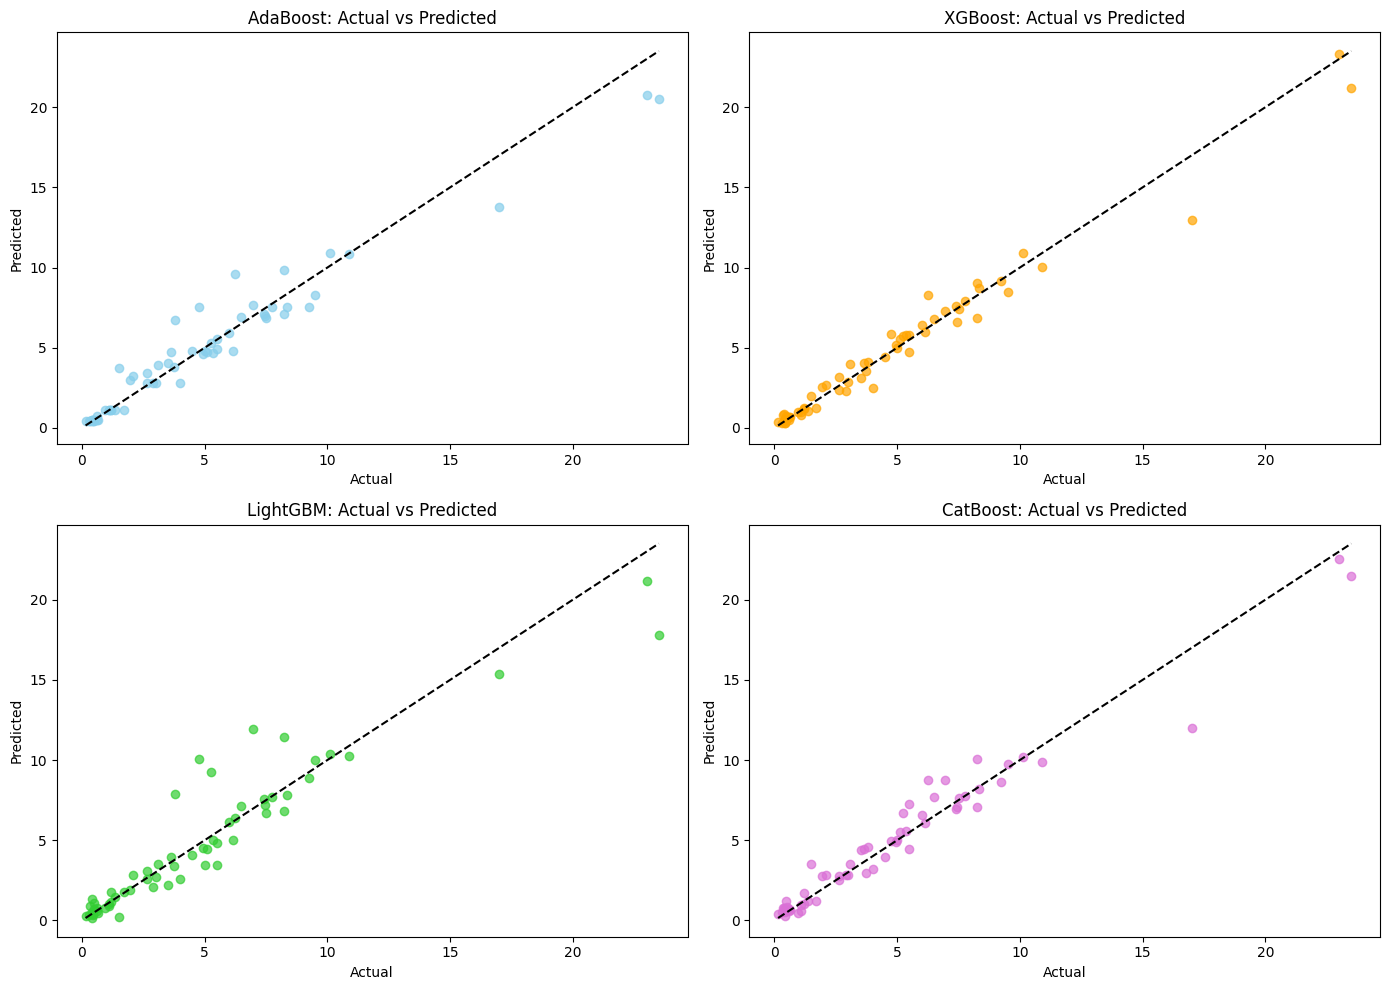

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# AdaBoost
axs[0, 0].scatter(y_test, ada_pred, alpha=0.7, color='skyblue')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0, 0].set_title('AdaBoost: Actual vs Predicted')

# XGBoost
axs[0, 1].scatter(y_test, xgb_pred, alpha=0.7, color='orange')
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0, 1].set_title('XGBoost: Actual vs Predicted')

# LightGBM
axs[1, 0].scatter(y_test, lgb_pred, alpha=0.7, color='limegreen')
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1, 0].set_title('LightGBM: Actual vs Predicted')

# CatBoost
axs[1, 1].scatter(y_test, cat_pred, alpha=0.7, color='orchid')
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1, 1].set_title('CatBoost: Actual vs Predicted')

for ax in axs.flat:
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()
